In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Load dataset (assuming it has more than 10,000 records)
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/kaggle_bot_accounts.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,Unnamed: 0,NAME,GENDER,EMAIL_ID,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,REGISTRATION_IPV4,REGISTRATION_LOCATION,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC,ISBOT
0,0,Johnny KerrThomas,Male,jacksonalan@example.com,False,53.0,87.0,5.0,3.0,124.0,NaN,81.88.75.170,Argentina,16.0,10.0,3.0,NaN
1,1,Dwayne LarsenLara,Male,calvin80@example.com,True,16.0,67.0,5.0,NaN,26.0,24.97,NaN,New Zealand,14.0,5.0,2.0,NaN
2,2,NaN,Male,qbrown@example.net,True,44.0,81.0,4.0,17.0,125.0,7.75,159.202.103.178,Costa Rica,16.0,4.0,0.0,False
3,3,Russell SimmonsPhillips,Male,kimberlywagner@example.com,True,23.0,114.0,5.0,24.0,67.0,13.40,196.11.132.51,Italy,21.0,10.0,1.0,False
4,4,Jamie WilsonMartinez,Female,shaunbrooks@example.com,False,46.0,112.0,2.0,12.0,63.0,24.83,159.196.199.20,Belgium,10.0,6.0,2.0,False


In [ ]:
# Display column names
print("Column Names:")
print(df.columns)

Column Names:
Index(['Unnamed: 0', 'NAME', 'GENDER', 'EMAIL_ID', 'IS_GLOGIN',
       'FOLLOWER_COUNT', 'FOLLOWING_COUNT', 'DATASET_COUNT', 'CODE_COUNT',
       'DISCUSSION_COUNT', 'AVG_NB_READ_TIME_MIN', 'REGISTRATION_IPV4',
       'REGISTRATION_LOCATION', 'TOTAL_VOTES_GAVE_NB', 'TOTAL_VOTES_GAVE_DS',
       'TOTAL_VOTES_GAVE_DC', 'ISBOT'],
      dtype='object')


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0                   0
NAME                     78164
GENDER                   77879
EMAIL_ID                 77814
IS_GLOGIN                77916
FOLLOWER_COUNT           77712
FOLLOWING_COUNT          78445
DATASET_COUNT            78567
CODE_COUNT               77926
DISCUSSION_COUNT         77722
AVG_NB_READ_TIME_MIN     78316
REGISTRATION_IPV4        78329
REGISTRATION_LOCATION    78290
TOTAL_VOTES_GAVE_NB      77705
TOTAL_VOTES_GAVE_DS      77934
TOTAL_VOTES_GAVE_DC      78030
ISBOT                    78500
dtype: int64


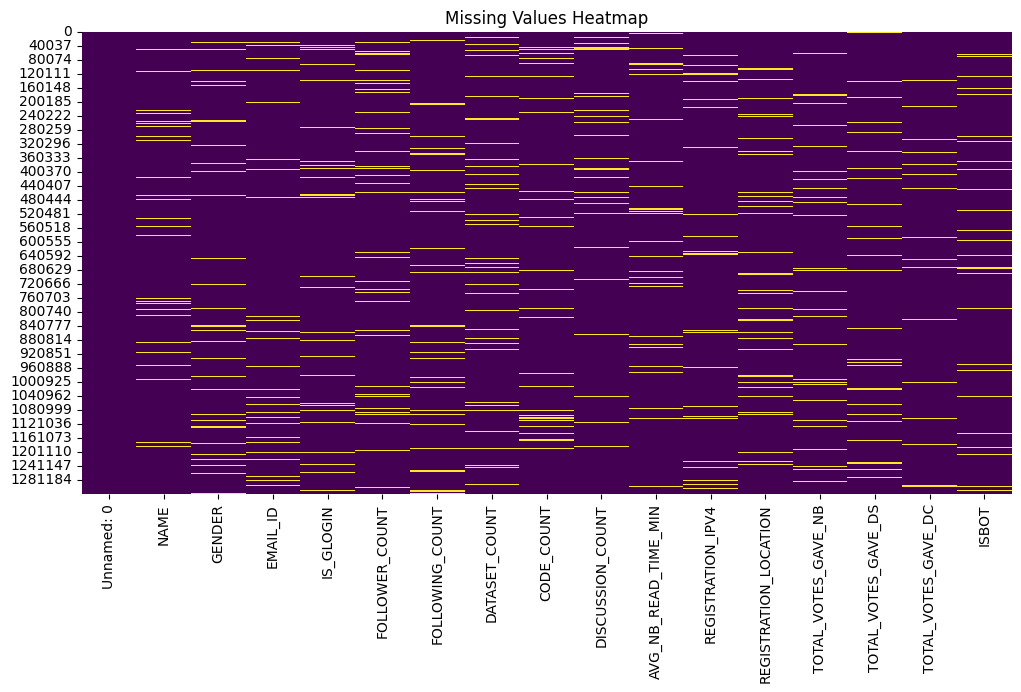

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

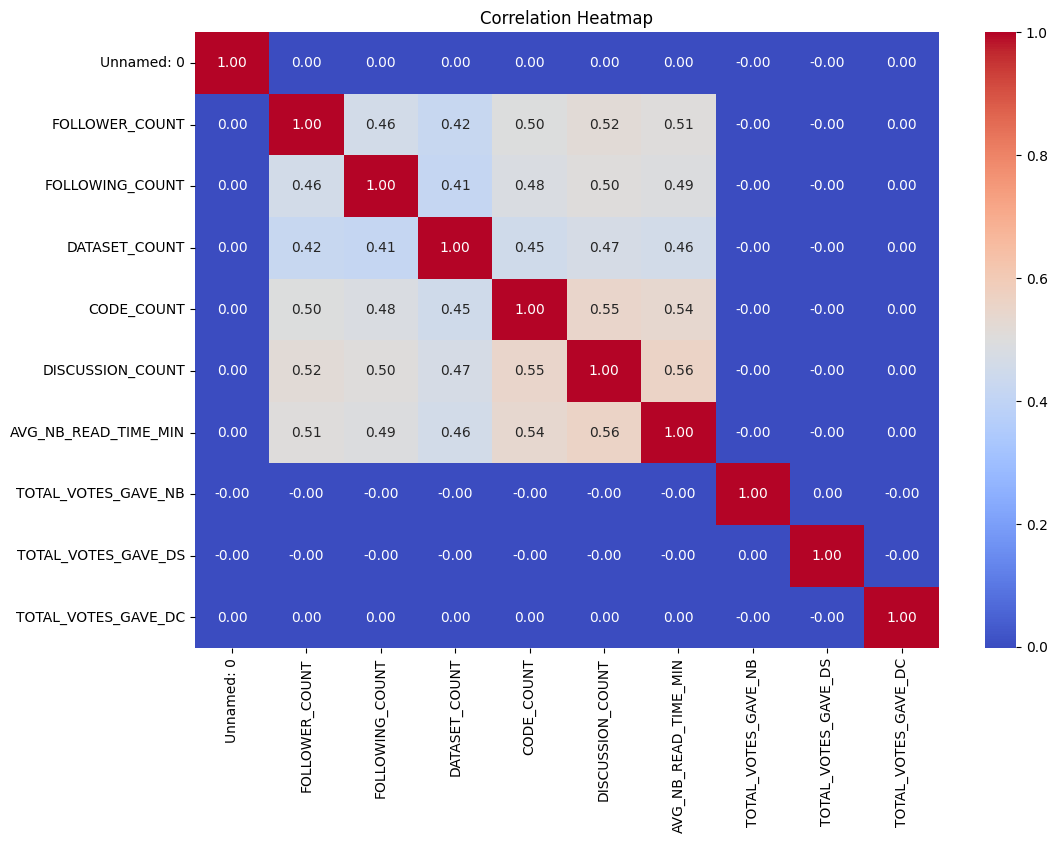

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
# df = pd.read_csv('your_file.csv')

# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


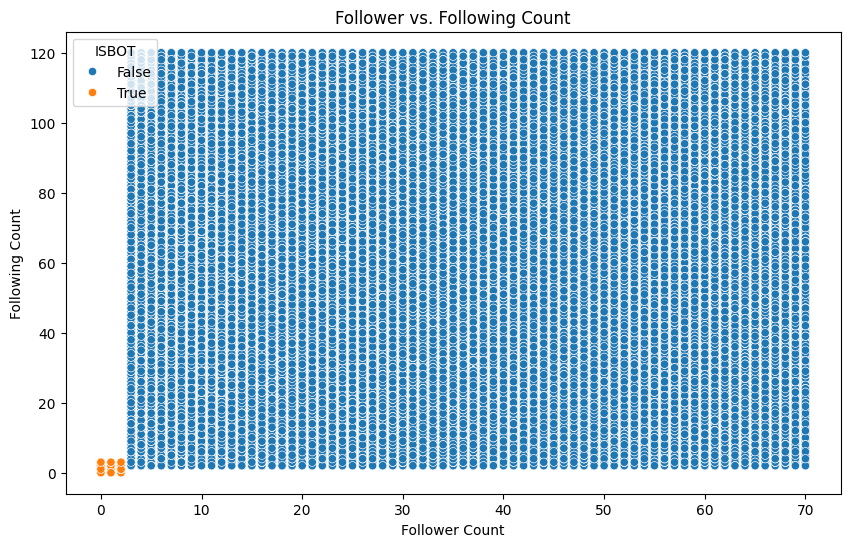

In [ ]:
# 3. Follower vs. Following Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FOLLOWER_COUNT', y='FOLLOWING_COUNT', hue='ISBOT', data=df)
plt.title('Follower vs. Following Count')
plt.xlabel('Follower Count')
plt.ylabel('Following Count')
plt.show()

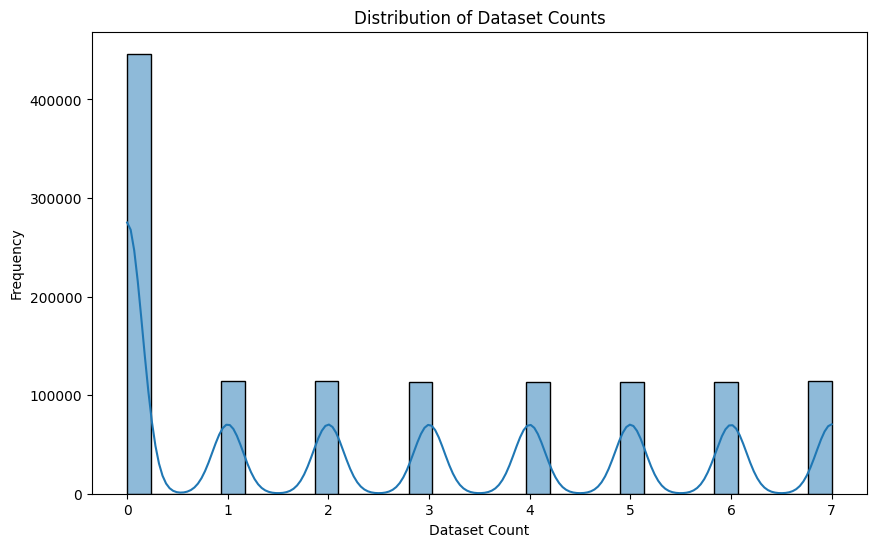

In [ ]:
# 4. Distribution of Dataset Counts
plt.figure(figsize=(10, 6))
sns.histplot(df['DATASET_COUNT'], bins=30, kde=True)
plt.title('Distribution of Dataset Counts')
plt.xlabel('Dataset Count')
plt.ylabel('Frequency')
plt.show()

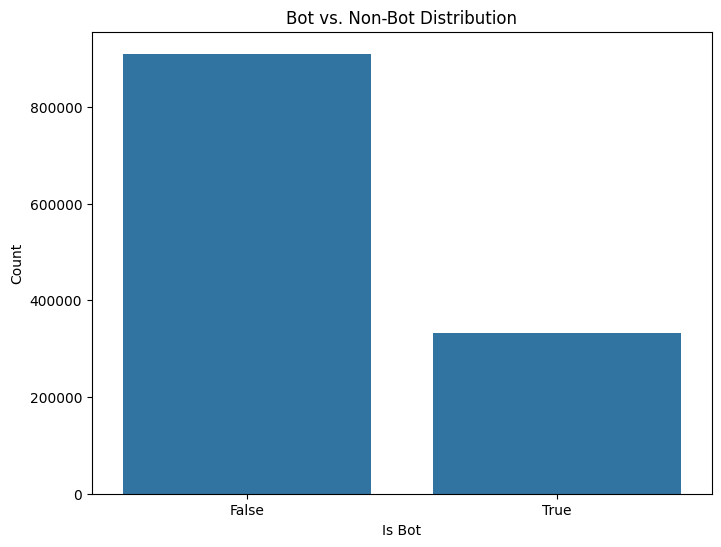

In [ ]:
# 5. Bot vs. Non-Bot Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='ISBOT', data=df)
plt.title('Bot vs. Non-Bot Distribution')
plt.xlabel('Is Bot')
plt.ylabel('Count')
plt.show()

In [ ]:
# Check the column names to ensure you're using the correct names
print(df.columns)

Index(['Unnamed: 0', 'NAME', 'GENDER', 'EMAIL_ID', 'IS_GLOGIN',
       'FOLLOWER_COUNT', 'FOLLOWING_COUNT', 'DATASET_COUNT', 'CODE_COUNT',
       'DISCUSSION_COUNT', 'AVG_NB_READ_TIME_MIN', 'REGISTRATION_IPV4',
       'REGISTRATION_LOCATION', 'TOTAL_VOTES_GAVE_NB', 'TOTAL_VOTES_GAVE_DS',
       'TOTAL_VOTES_GAVE_DC', 'ISBOT'],
      dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

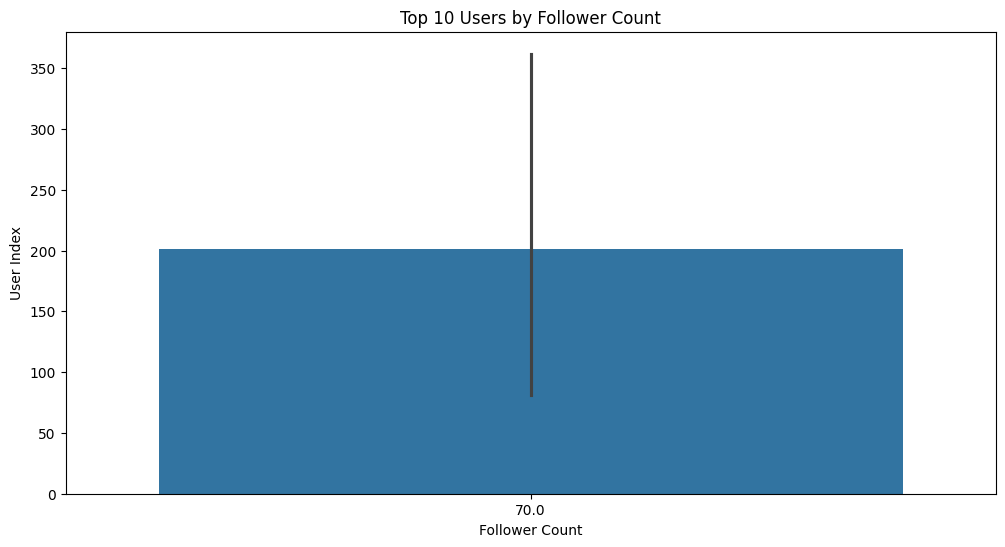

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
# df = pd.read_csv('your_file.csv')

# 6. Top 10 Users by Follower Count (without specific names)
plt.figure(figsize=(12, 6))
top_10_followers = df.nlargest(10, 'FOLLOWER_COUNT')
sns.barplot(x=top_10_followers['FOLLOWER_COUNT'], y=top_10_followers.index)
plt.title('Top 10 Users by Follower Count')
plt.xlabel('Follower Count')
plt.ylabel('User Index')
plt.show()


In [ ]:
# Display descriptive statistics
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,Unnamed: 0,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC
count,1.321188e+06,1.243476e+06,1.242743e+06,1.242621e+06,1.243262e+06,1.243466e+06,1.242872e+06,1.243483e+06,1.243254e+06,1.243158e+06
mean,6.605935e+05,2.698273e+01,4.505091e+01,2.562564e+00,1.038450e+01,6.584244e+01,1.274225e+01,1.750656e+01,6.501007e+00,1.500373e+00
std,3.813943e+05,2.300504e+01,3.947716e+01,2.499882e+00,8.248055e+00,4.754315e+01,9.564920e+00,4.611783e+00,2.290951e+00,1.118067e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,3.000000e+00,0.000000e+00
25%,3.302968e+05,2.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.300000e+01,1.870000e+00,1.400000e+01,5.000000e+00,1.000000e+00
50%,6.605935e+05,2.400000e+01,3.900000e+01,2.000000e+00,1.000000e+01,6.500000e+01,1.229000e+01,1.800000e+01,7.000000e+00,2.000000e+00
75%,9.908902e+05,4.700000e+01,8.000000e+01,5.000000e+00,1.800000e+01,1.080000e+02,2.119000e+01,2.200000e+01,9.000000e+00,3.000000e+00
max,1.321187e+06,7.000000e+01,1.200000e+02,7.000000e+00,2.500000e+01,1.500000e+02,2.999000e+01,2.500000e+01,1.000000e+01,3.000000e+00


In [ ]:
# Check class distribution
df['ISBOT'].value_counts()

,count
ISBOT,
False,909794
True,332894


In [ ]:
# Handle missing values in the target column
df['ISBOT'] = df['ISBOT'].fillna(df['ISBOT'].mode()[0])
df['ISBOT'] = df['ISBOT'].astype(int)

# Column Selection: Keeping only essential columns
essential_columns = [
    'GENDER', 'IS_GLOGIN', 'FOLLOWER_COUNT', 'FOLLOWING_COUNT', 'DATASET_COUNT',
    'CODE_COUNT', 'DISCUSSION_COUNT', 'TOTAL_VOTES_GAVE_NB'
]
df = df[essential_columns + ['ISBOT']]

# Identify non-numeric columns in the features
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns.tolist()}")


Non-numeric columns: ['GENDER', 'IS_GLOGIN']


In [ ]:
# Function to clean data
def clean_data(X, y, numeric_features, categorical_features, strategy_num='mean', strategy_cat='most_frequent'):
    # Preprocessing for numeric data
    numeric_transformer = SimpleImputer(strategy=strategy_num)
    # Preprocessing for categorical data
    categorical_transformer = SimpleImputer(strategy=strategy_cat)
    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    # Apply the transformations
    X_imputed = pd.DataFrame(preprocessor.fit_transform(X), columns=numeric_features + categorical_features)

    # Drop rows with NaN values in both X and y
    combined = pd.concat([X_imputed, y.reset_index(drop=True)], axis=1)
    combined_cleaned = combined.dropna()

    # Separate X_imputed and y_clean
    X_clean = combined_cleaned.drop(columns=[y.name])
    y_clean = combined_cleaned[y.name]

    return X_clean, y_clean

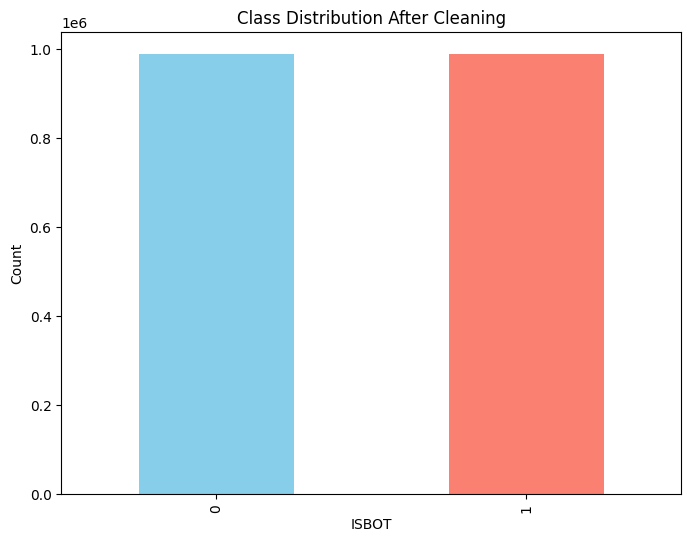

In [ ]:
# Convert non-numeric columns to numeric using label encoding
label_encoders = {}
for col in non_numeric_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Handle missing values in the feature set
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(df.drop('ISBOT', axis=1)), columns=df.drop('ISBOT', axis=1).columns)
y = df['ISBOT']

# 2. Data Balancing: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Combine the resampled features and target into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.DataFrame(y_res, columns=['ISBOT'])], axis=1)

# 3. Data Cleaning and Visualization: Generate a bar plot to show the number of records post-cleaning
plt.figure(figsize=(8, 6))
df_resampled['ISBOT'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution After Cleaning')
plt.xlabel('ISBOT')
plt.ylabel('Count')
plt.show()

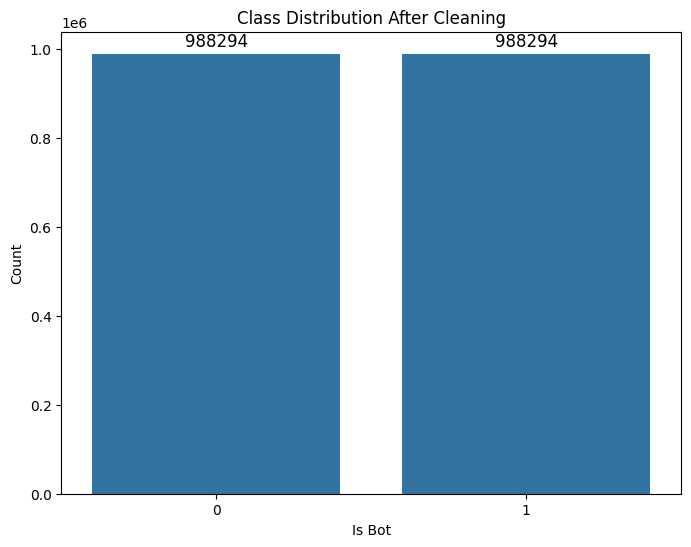

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='ISBOT', data=df_resampled)
plt.title('Class Distribution After Cleaning')
plt.xlabel('Is Bot')
plt.ylabel('Count')

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [ ]:
# Check for balanced vs. unbalanced data
balanced = df_resampled['ISBOT'].value_counts(normalize=True).max() < 0.6
print(f"\nIs the data balanced? {'Yes' if balanced else 'No'}")


Is the data balanced? Yes


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Display the first few rows of the dataset
print("Dataset Preview:")
df_resampled.head()

Dataset Preview:


,GENDER,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,TOTAL_VOTES_GAVE_NB,ISBOT
0,1.0,0.0,53.0,87.0,5.0,3.0,124.0,16.0,0
1,1.0,1.0,16.0,67.0,5.0,1.0,26.0,14.0,0
2,1.0,1.0,44.0,81.0,4.0,17.0,125.0,16.0,0
3,1.0,1.0,23.0,114.0,5.0,24.0,67.0,21.0,0
4,0.0,0.0,46.0,112.0,2.0,12.0,63.0,10.0,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Sample 5000 records from the dataframe
df_resampled_sampled = df_resampled.sample(n=40000, random_state=42)

# Define your numeric and categorical feature columns based on available columns
numeric_features = ['FOLLOWER_COUNT', 'FOLLOWING_COUNT', 'DATASET_COUNT',
                    'CODE_COUNT', 'DISCUSSION_COUNT', 'TOTAL_VOTES_GAVE_NB']

categorical_features = ['GENDER', 'IS_GLOGIN']

# Separate features and target
X_resampled = df_resampled_sampled.drop(columns=['ISBOT'])  # Assuming 'ISBOT' is the target column
y_resampled = df_resampled_sampled['ISBOT']

# Function to clean data
def clean_data(X, y, numeric_features, categorical_features, strategy_num='mean', strategy_cat='most_frequent'):
    # Preprocessing for numeric data
    numeric_transformer = SimpleImputer(strategy=strategy_num)
    # Preprocessing for categorical data
    categorical_transformer = SimpleImputer(strategy=strategy_cat)
    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    # Apply the transformations
    X_imputed = pd.DataFrame(preprocessor.fit_transform(X), columns=numeric_features + categorical_features)

    # Drop rows with NaN values in both X and y
    combined = pd.concat([X_imputed, y.reset_index(drop=True)], axis=1)
    combined_cleaned = combined.dropna()

    # Separate X_imputed and y_clean
    X_clean = combined_cleaned.drop(columns=[y.name])
    y_clean = combined_cleaned[y.name]

    return X_clean, y_clean

# Clean the data
X_clean, y_clean = clean_data(X_resampled, y_resampled, numeric_features, categorical_features)

# Convert categorical data to numerical using OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X_clean[categorical_features]),
                         columns=encoder.get_feature_names_out(categorical_features))

# Concatenate numeric and encoded categorical features
X_clean_encoded = pd.concat([X_clean[numeric_features].reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

# Double-check the lengths of X and y
assert len(X_clean_encoded) == len(y_clean), "Inconsistent number of samples between X and y."

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_clean_encoded, y_clean)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Define the classifiers
gboost = GradientBoostingClassifier()
xgboost = XGBClassifier()
logreg = LogisticRegression(max_iter=1000)

# Hyperparameter search space for RandomizedSearchCV
param_dist_gboost = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
param_dist_xgboost = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
param_dist_logreg = {'C': [0.01, 0.1, 1, 10]}

# Set up RandomizedSearchCV for Gradient Boosting
random_search_gboost = RandomizedSearchCV(gboost, param_distributions=param_dist_gboost, n_iter=10, cv=3, random_state=42, n_jobs=-1)

# Set up RandomizedSearchCV for XGBoost
random_search_xgboost = RandomizedSearchCV(xgboost, param_distributions=param_dist_xgboost, n_iter=10, cv=3, random_state=42, n_jobs=-1)

# Set up RandomizedSearchCV for Logistic Regression
random_search_logreg = RandomizedSearchCV(logreg, param_distributions=param_dist_logreg, n_iter=10, cv=3, random_state=42, n_jobs=-1)

# Fit the models
print("\nOptimizing Gradient Boosting Classifier...")
random_search_gboost.fit(X_train, y_train)

print("\nOptimizing XGBoost Classifier...")
random_search_xgboost.fit(X_train, y_train)

print("\nOptimizing Logistic Regression Classifier...")
random_search_logreg.fit(X_train, y_train)

# Best estimators
gboost_best = random_search_gboost.best_estimator_
xgboost_best = random_search_xgboost.best_estimator_
logreg_best = random_search_logreg.best_estimator_



Optimizing Gradient Boosting Classifier...

Optimizing XGBoost Classifier...

Optimizing Logistic Regression Classifier...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Sample 5000 records from the dataframe
df_resampled_sampled = df_resampled.sample(n=50000, random_state=42)

# Define your numeric and categorical feature columns based on available columns
numeric_features = ['FOLLOWER_COUNT', 'FOLLOWING_COUNT', 'DATASET_COUNT',
                    'CODE_COUNT', 'DISCUSSION_COUNT', 'TOTAL_VOTES_GAVE_NB']

categorical_features = ['GENDER', 'IS_GLOGIN']

# Separate features and target
X_resampled = df_resampled_sampled.drop(columns=['ISBOT'])  # Assuming 'ISBOT' is the target column
y_resampled = df_resampled_sampled['ISBOT']


# Clean the data
X_clean, y_clean = clean_data(X_resampled, y_resampled, numeric_features, categorical_features)

# Convert categorical data to numerical using OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X_clean[categorical_features]),
                         columns=encoder.get_feature_names_out(categorical_features))

# Concatenate numeric and encoded categorical features
X_clean_encoded = pd.concat([X_clean[numeric_features].reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

# Double-check the lengths of X and y
assert len(X_clean_encoded) == len(y_clean), "Inconsistent number of samples between X and y."

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_clean_encoded, y_clean)



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Define the classifiers
gboost = GradientBoostingClassifier()
xgboost = XGBClassifier()
logreg = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier()
baseline = DummyClassifier(strategy='most_frequent')  # Baseline model that always predicts the majority class

# Hyperparameter search space for RandomizedSearchCV
param_dist_gboost = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
param_dist_dtree = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

# Set up RandomizedSearchCV for Gradient Boosting
random_search_gboost = RandomizedSearchCV(gboost, param_distributions=param_dist_gboost, n_iter=10, cv=3, random_state=42, n_jobs=-1)

# Set up RandomizedSearchCV for Decision Tree
random_search_dtree = RandomizedSearchCV(dtree, param_distributions=param_dist_dtree, n_iter=10, cv=3, random_state=42, n_jobs=-1)

# Fit the models
print("\nOptimizing Gradient Boosting Classifier...")
random_search_gboost.fit(X_train, y_train)

print("\nOptimizing Decision Tree Classifier...")
random_search_dtree.fit(X_train, y_train)


# Best estimators
gboost_best = random_search_gboost.best_estimator_
dtree_best = random_search_dtree.best_estimator_



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Optimizing Gradient Boosting Classifier...

Optimizing Decision Tree Classifier...


In [ ]:


cv_scores_gboost = cross_val_score(gboost_best, X_balanced, y_balanced, cv=5)
print(f"Gradient Boosting  Accuracy: {cv_scores_gboost.mean() * 100:.2f}%")


cv_scores_dtree = cross_val_score(dtree_best, X_balanced, y_balanced, cv=5)
print(f"Decision Tree  Accuracy: {cv_scores_dtree.mean() * 100:.2f}%")

Gradient Boosting  Accuracy: 98.97%
Decision Tree  Accuracy: 98.94%


Classification Report for Gradient Boosting Classifier (Accuracy: 98.97%):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5010
           1       0.98      1.00      0.99      5010

    accuracy                           0.99     10020
   macro avg       0.99      0.99      0.99     10020
weighted avg       0.99      0.99      0.99     10020



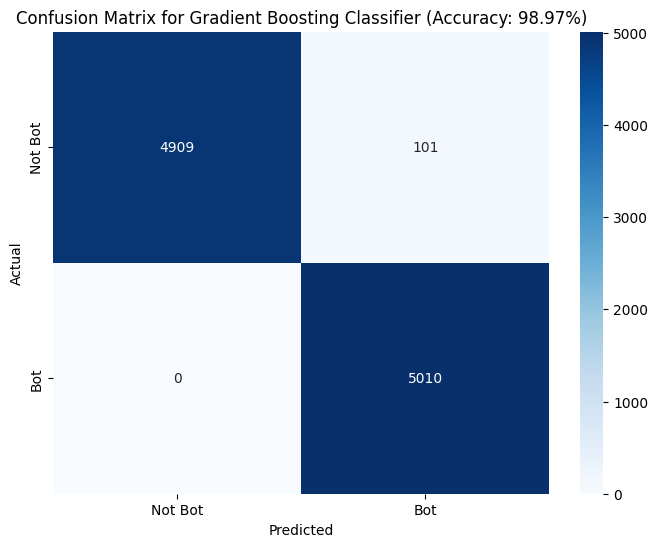

Classification Report for Decision Tree Classifier (Accuracy: 98.94%):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5010
           1       0.98      1.00      0.99      5010

    accuracy                           0.99     10020
   macro avg       0.99      0.99      0.99     10020
weighted avg       0.99      0.99      0.99     10020



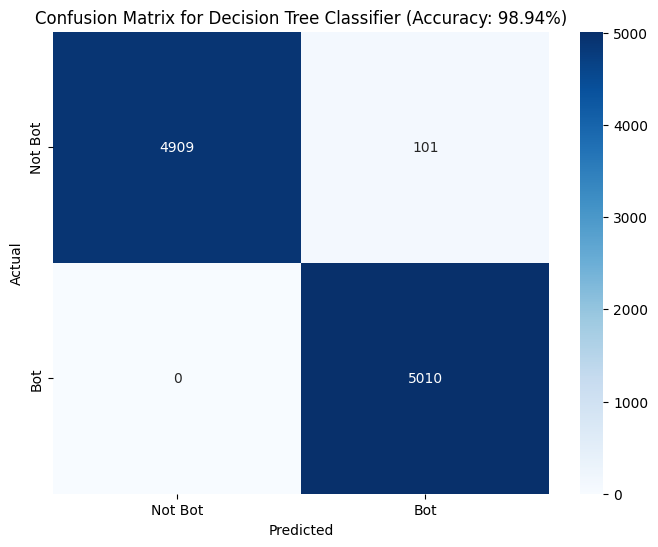

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Function to print classification report and plot confusion matrix manually
def evaluate_model(y_test, y_pred, model_name):
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Bot', 'Bot'], yticklabels=['Not Bot', 'Bot'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Predict on the test set using the best models
y_pred_gboost = gboost_best.predict(X_test)
y_pred_dtree = dtree_best.predict(X_test)

# Evaluate Gradient Boosting Classifier
evaluate_model(y_test, y_pred_gboost, "Gradient Boosting Classifier (Accuracy: 98.97%)")

# Evaluate Decision Tree Classifier
evaluate_model(y_test, y_pred_dtree, "Decision Tree Classifier (Accuracy: 98.94%)")


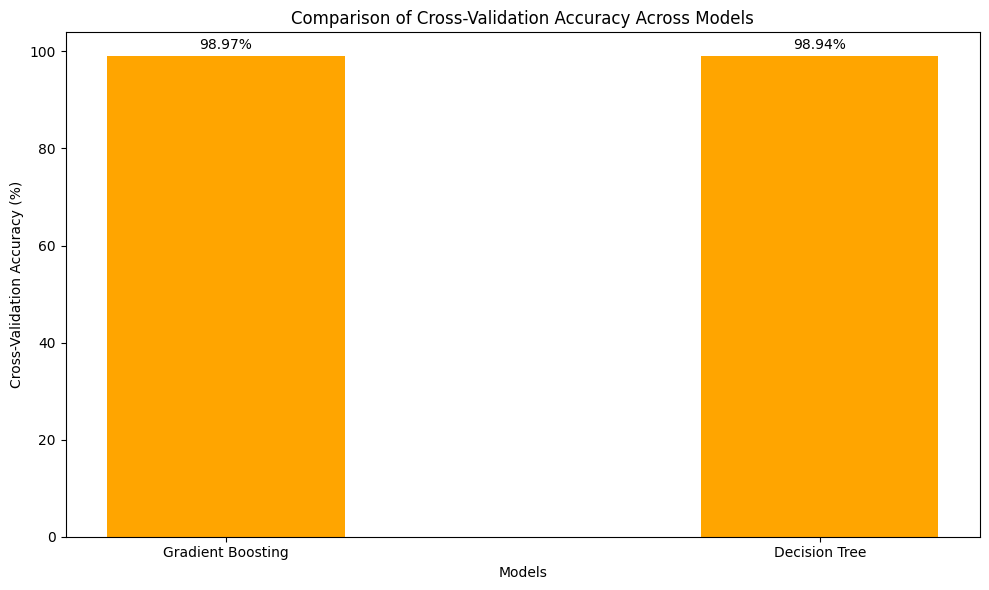

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models and Cross-Validation Accuracies
models = ['Gradient Boosting', 'Decision Tree']
cross_val_accuracies = [98.97, 98.94]

# Plotting the cross-validation accuracies
x = np.arange(len(models))  # label locations
width = 0.4  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(x, cross_val_accuracies, width, color='orange')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Cross-Validation Accuracy (%)')
ax.set_title('Comparison of Cross-Validation Accuracy Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models)

# Adding text labels on the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars)

plt.tight_layout()
plt.show()


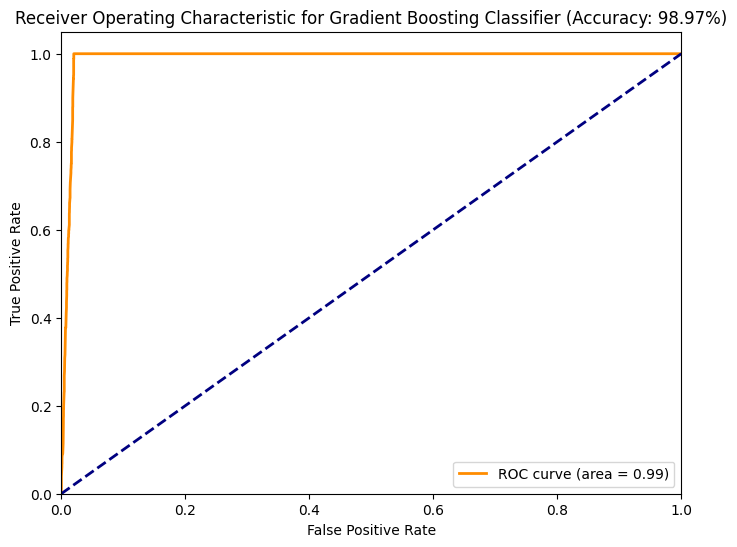

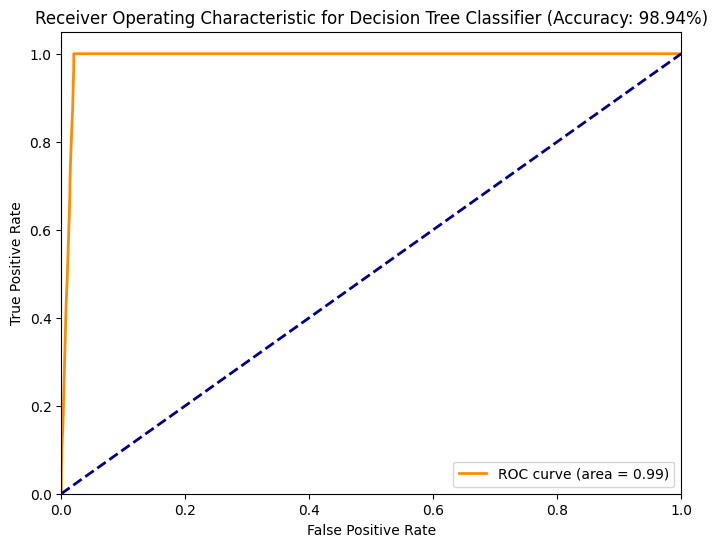

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Predict probabilities for the positive class (Bot) using the best models
y_pred_proba_gboost = gboost_best.predict_proba(X_test)[:, 1]
y_pred_proba_dtree = dtree_best.predict_proba(X_test)[:, 1]

# Plot ROC curve for Gradient Boosting Classifier
plot_roc_curve(y_test, y_pred_proba_gboost, "Gradient Boosting Classifier (Accuracy: 98.97%)")

# Plot ROC curve for Decision Tree Classifier
plot_roc_curve(y_test, y_pred_proba_dtree, "Decision Tree Classifier (Accuracy: 98.94%)")
